<a href="https://colab.research.google.com/github/mazarimono/pyconjp2021/blob/main/PyConJP_05_sentinel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GIS with Python！！！
## Notebook "Satellite Data" part
- Chomoku LLC: Hideyuki Ogawa
- My twitter([@ogawahideyuki](https://twitter.com/ogawahideyuki))
- Company twitter [@hijichomoku](https://twitter.com/hijichomoku)
- https://chomoku.com/

- Data: Copernicus Open Access Hub
    - https://scihub.copernicus.eu/


In [ ]:
!pip install rasterio &> /dev/null
!pip install rioxarray &> /dev/null
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal &> /dev/null
# Install rtree - Geopandas requirment
!apt install python3-rtree &> /dev/null
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git &> /dev/null
# Install descartes - Geopandas requirment
!pip install descartes &> /dev/null

In [ ]:
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt
import rioxarray as rxr

In [ ]:
# read file
tci_path = Path('/content/drive/MyDrive/pyconjp2021/data/tanakami_sat/S2A_MSIL2A_20201012T013701_N0214_R117_T53SNU_20201012T040954.SAFE/GRANULE/L2A_T53SNU_A027713_20201012T013659/IMG_DATA/R10m/T53SNU_20201012T013701_TCI_10m.jp2')
da = rxr.open_rasterio(tci_path)
da_date = tci_path.stem.split('_')[1].split('T')[0]
da

<xarray.DataArray (band: 3, y: 10980, x: 10980)>
[361681200 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05 6.098e+05
  * y            (y) float64 3.9e+06 3.9e+06 3.9e+06 ... 3.79e+06 3.79e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

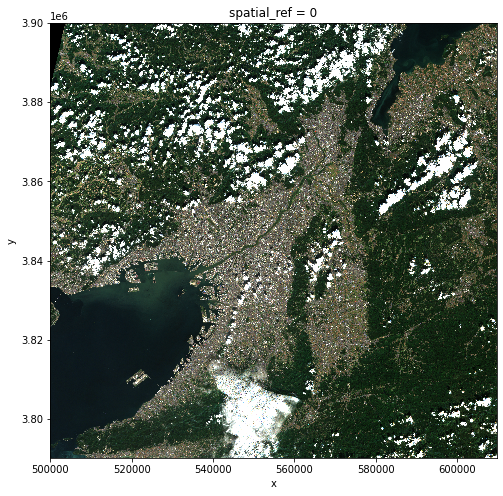

In [ ]:
fig = plt.figure(figsize=(8, 8))
da.plot.imshow()

In [ ]:
# 読み込んだデータのCRSを確認
# 32653になっている。
print(da.rio.crs)

# EPSG:4326に設定変更

da4326 = da.rio.reproject('EPSG:4326')
print(da4326.rio.crs)

EPSG:32653
EPSG:4326


In [ ]:
da4326

<xarray.DataArray (band: 3, y: 9954, x: 12061)>
array([[[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)
Coordinates:
  * x            (x) float64 135.0 135.0 135.0 135.0 ... 136.2 136.2 136.2 136.2
  * y            (y) float64 35.24 35.24 35.24 35.24 ... 34.25 34.25 34.25 34.25
  * band         (band) int64 1 2 3
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    _FillValue:    255

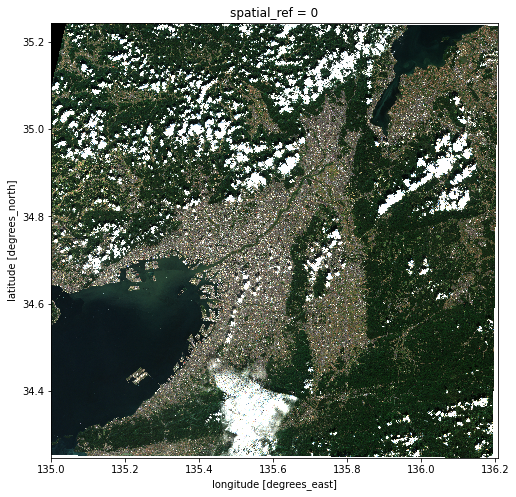

In [ ]:
fig = plt.figure(figsize=(8, 8))
da4326.plot.imshow()

In [ ]:
yama = gpd.read_file('/content/drive/MyDrive/pyconjp2021/data/tanakamiyama/tanakamiyama.geojson')
yama_line_bounds = yama['geometry'][0].boundary.bounds
# select data
yama_da = da4326.sel(x=slice(yama_line_bounds[0], yama_line_bounds[2]),
                             y=slice(yama_line_bounds[3], yama_line_bounds[1]))

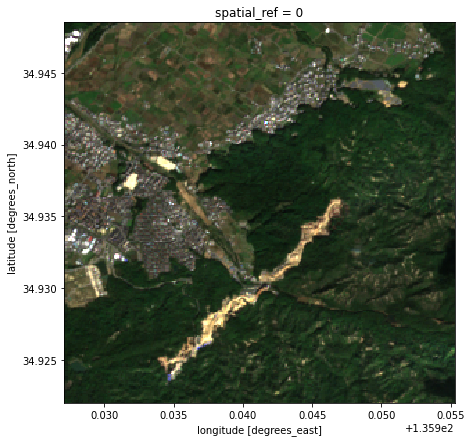

In [ ]:
fig = plt.figure(figsize=(7, 7))
plt.title(f'{da_date}')
yama_da.plot.imshow()

In [ ]:
tci_path2 = Path('/content/drive/MyDrive/pyconjp2021/data/tanakami_sat/S2B_MSIL2A_20211002T013649_N0301_R117_T53SNU_20211002T040855.SAFE/GRANULE/L2A_T53SNU_A023881_20211002T014358/IMG_DATA/R10m/T53SNU_20211002T013649_TCI_10m.jp2')
da1 = rxr.open_rasterio(tci_path2)
da1_date = tci_path2.stem.split('_')[1].split('T')[0]
da14326 = da1.rio.reproject('EPSG:4326')
yama_da2 = da14326.sel(x=slice(yama_line_bounds[0], yama_line_bounds[2]),
                             y=slice(yama_line_bounds[3], yama_line_bounds[1]))

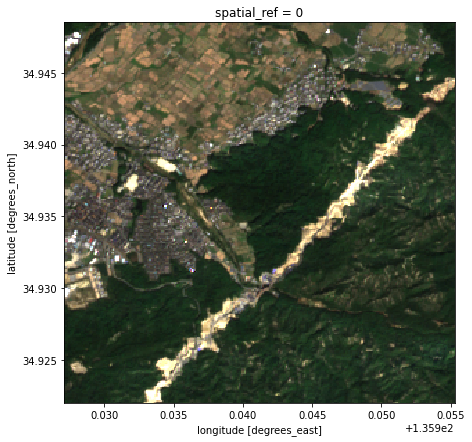

In [ ]:
fig = plt.figure(figsize=(7, 7))
yama_da2.plot.imshow()